# Image Segmentation - Part 4: Unsupervised Machine Learning

In [ ]:
import os

# Detect notebook environment
def detect_notebook_environment():
    if 'COLAB_GPU' in os.environ:
        print('Google Colaboratory detected.')
        %pip install "altair>=5" ipympl plantcv
        
        # Give access and mount your Google Drive (need a Google Account)
        from google.colab import drive
        drive.mount('/content/gdrive')
        
        # Enable widget feature with matplotlib
        from google.colab import output
        output.enable_custom_widget_manager()
        
        #View working directory, may need to change
        %pwd
    else:
        print('Binder detected.')

environment = detect_notebook_environment()

In [1]:
%matplotlib widget
import matplotlib
from plantcv import plantcv as pcv
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

## Clustering (unsupervised machine learning)

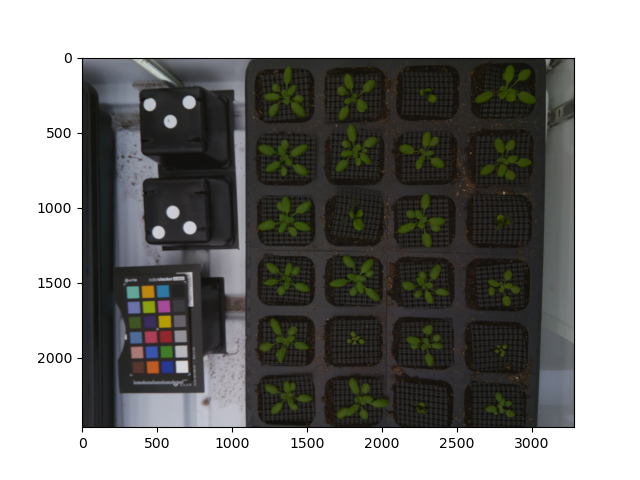

In [3]:
# Open image file
color_img, imgpath, imgname = pcv.readimage(filename="./images/10.9.1.230_pos-165-001-004_2019-11-01-10-05.jpg")

### mini-batch k-means

/Users/nfahlgren/miniconda3/envs/plantcv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


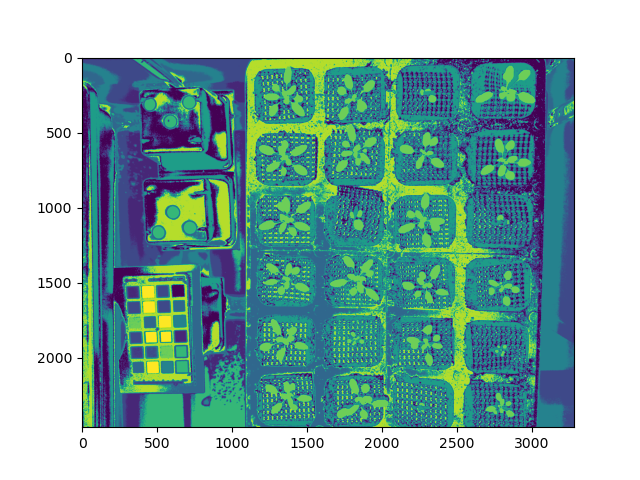

In [6]:
# Create a kmeans model with a defined number of clusters
kmeans = MiniBatchKMeans(n_clusters=10, random_state=999)
# Get the shape of the color image
h, w, d = color_img.shape
# Train the kmeans model with the linearized RGB values
kmeans.fit(color_img.reshape(h * w, d))
# Predict labels for the training image
labels = kmeans.predict(color_img.reshape(h * w, d))
# Reshape the labels into an image
labels = labels.reshape(h, w).astype("uint8")
# Plot the colorized labels
pcv.plot_image(labels, cmap="viridis")

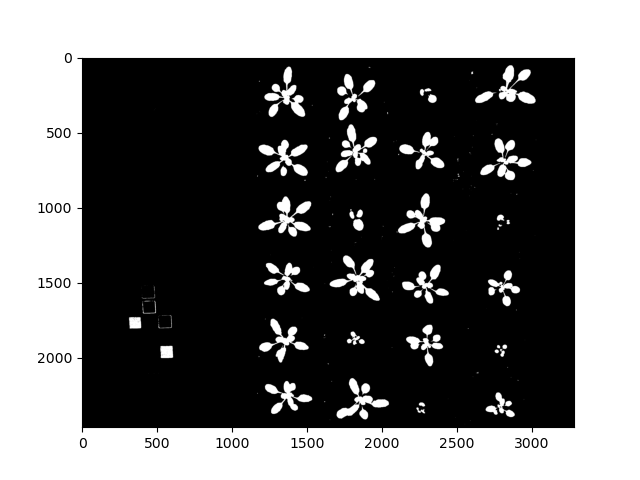

In [7]:
# Create an empty binary mask
kmeans_mask = np.zeros(labels.shape, dtype="uint8")
# kmeans_mask[np.where(np.logical_or(labels == 4, labels == 2))] = 255
# Set the mask to white where the kmeans cluster label overlaps plants
kmeans_mask[np.where(labels == 7)] = 255
# Plot the mask
pcv.plot_image(kmeans_mask)